# Notebook for Trying All Thresholds

First we import the required libraries

In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy
#import tifffile
import os

import skimage

from skimage import data
from skimage.io import imsave

from skimage.filters import threshold_otsu
from skimage.filters import try_all_threshold

Next, we Initialize our array and we load our images into it

In [3]:
raw_ct_scan_array = []

for fname in os.listdir('img/'):

        im = Image.open(os.path.join('img/',fname))
        imarray = numpy.array(im)
        raw_ct_scan_array.append(imarray)

raw_ct_scan_array = numpy.asarray(raw_ct_scan_array, dtype='uint8')

We can check our array using the shape attribute

In case color's don't work
(Source: https://stackoverflow.com/questions/38709618/rgb-values-being-returned-by-pil-dont-match-rgb-color,

for reference: https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/)

In [3]:
raw_ct_scan_array.shape

(344, 1024, 1024)

For example, let's see the 153rd Slice in our array

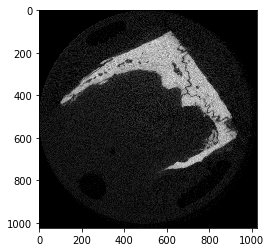

In [4]:
plt.imshow(raw_ct_scan_array[153],cmap="gray")

Let's create a flattened 1D array from our 4 dimensional array. Method mentioned at this URL.
(https://stackoverflow.com/questions/13730468/from-nd-to-1d-arrays)

Professor mentioned array reshape function, also look into that as well.

(Source: https://stackoverflow.com/questions/36384760/transforming-a-row-vector-into-a-column-vector-in-numpy)

In [5]:
flattened_row_array=raw_ct_scan_array.ravel()

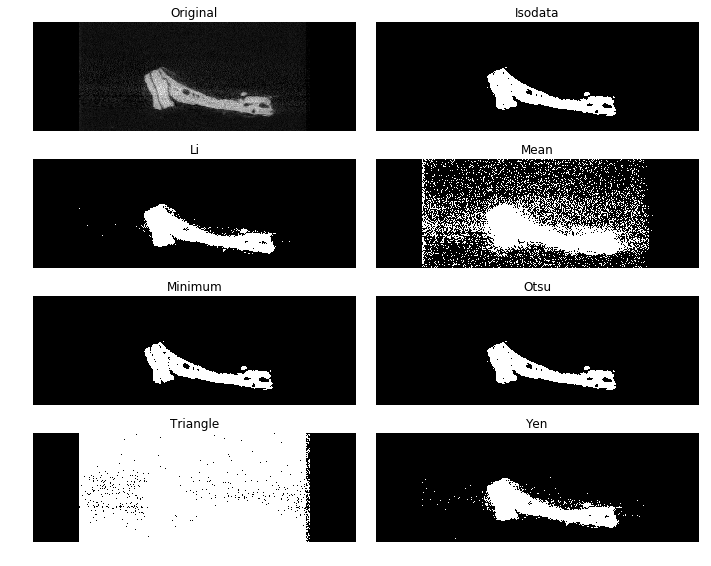

In [7]:
fig, ax = try_all_threshold(raw_ct_scan_array[:,:,153],figsize=(10,8),verbose = False)

Now, we're going to apply threshold_otsu function on our 1D Vector. (Save before executing, might crash)

In [6]:
flattened_row_array.shape

(360710144,)

In [7]:
column_array=flattened_row_array.reshape(-1,1)

In [8]:
column_array

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

The resulting image is in grayscale. However, imshow, by default, uses a kind of heatmap (called vidris) to display the image intensities. Just specify the grayscale colormap as shown below:
plt.imshow(mountain_r, cmap="gray")
For all the possible colormaps, have a look at the colormap reference.
(Source: https://stackoverflow.com/questions/39805697/skimage-why-does-rgb2gray-from-skimage-color-result-in-a-colored-image)

Shape of the flattened_array is (1442840576,). now it's (360710144,)

Apply thresholding

In [9]:
%time thresh = threshold_otsu(column_array)

Wall time: 3.13 s


Wall time: 3.36 s (Recorded time to execute thresholding on the vector. Same timing on both row and column vectors.)

(On first run, PC freezed. After cold booting again, it worked the second time)

In [10]:
print(thresh)

69


Threshold value is SAME for both row and column vectors.

So now we have the threshold value in above thresh variable. We apply that using a simple binary operation, >

It basically sets all values above the threshold to TRUE, and everything else as FALSE. (Interpreted as 1 and 0)

In [11]:
thresholded_array = raw_ct_scan_array > thresh

Variable that stores the thresholded array

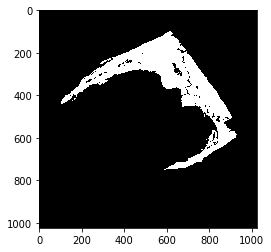

In [12]:
plt.imshow(thresholded_array[153,:,:],cmap="gray")

Refer this for file saving methods using PIL and scipy

(Source: https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image)

imsave('Path_to_your_folder/File_name.jpg',your_array) << Use this with skimage.io > imsave function

https://stackoverflow.com/questions/10965417/how-to-convert-numpy-array-to-pil-image-applying-matplotlib-colormap << This worked 

In [47]:
for img_index in range(0,344):
    im = Image.fromarray(numpy.uint8(thresholded_array[img_index,:,:]*255))

    im.save("Otsu_output/otsu_threshold_slice(%d) .png" % (img_index+1))

Our thresholded output is in the folder called Otsu_output.